# Exercises week 39

## Figures


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import (
    PolynomialFeatures,
)  # use the fit_transform method of the created object!
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

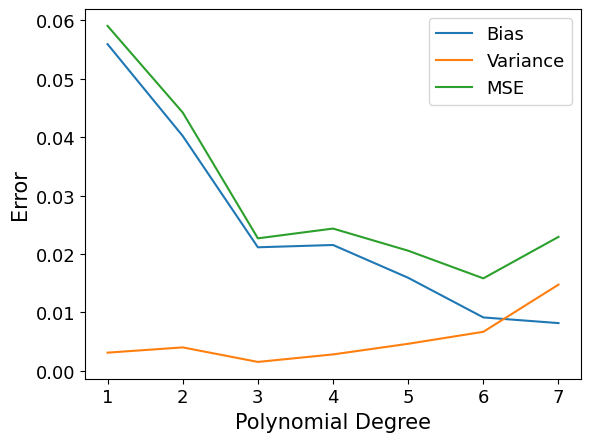

In [2]:
n = 100
bootstraps = 1000

np.random.seed(42)

x = np.linspace(-3, 3, n).reshape(-1, 1)
y = np.exp(-(x**2)) + 1.5 * np.exp(-((x - 2) ** 2)) + np.random.normal(0, 0.1)

biases = []
variances = []
mses = []
degrees = range(1, 8)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5)

for p in degrees:
    predictions = np.empty((y_test.shape[0], bootstraps))
    poly = PolynomialFeatures(degree=p)
    for b in range(bootstraps):
       x_, y_ = resample(x_train, y_train)
       X_ = poly.fit_transform(x_)
       # fit your model on the sampled data
       model = LinearRegression().fit(X_, y_)
       # make predictions on the test data
       X_test_poly = poly.transform(x_test)
       predictions[:,b] = model.predict(X_test_poly).ravel()

    biases.append(np.mean( (y_test - np.mean(predictions, axis=1, keepdims=True))**2 ))
    variances.append(np.mean( np.var(predictions, axis=1, keepdims=True) ))
    mses.append(np.mean( np.mean((y_test - predictions)**2, axis=1, keepdims=True) ))

plt.plot(degrees, biases, label='Bias')
plt.plot(degrees, variances, label='Variance')
plt.plot(degrees, mses, label='MSE')
plt.xlabel('Polynomial Degree', fontsize=15) 
plt.ylabel('Error', fontsize=15)
plt.yticks(fontsize=13)
plt.xticks(degrees, fontsize=13)
plt.legend(fontsize=13)
plt.savefig("bias_variance.png", dpi=300, bbox_inches='tight')
plt.show()

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

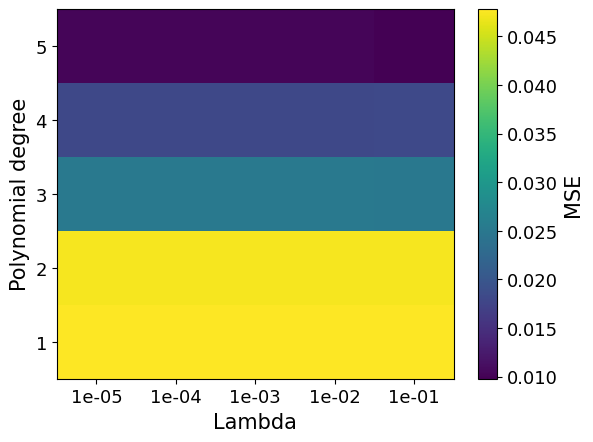

In [4]:
n = 100
x = np.linspace(-3, 3, n)
y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2) + np.random.normal(0, 0.1)

def polynomial_features(x, p, intercept=False):
    n = len(x)
    X = np.zeros((n, p))
    for i in range(p):
        X[:, i] = x**(i+1)
    if intercept:
        X = np.hstack((np.ones((n, 1)), X))
    return X

def Ridge_parameters(X, y, lmbda):
    # Assumes X is scaled and has no intercept column
    return np.linalg.inv(X.T @ X + lmbda * np.eye(X.shape[1])) @ X.T @ y

np.random.seed(42)

lambdas = np.logspace(-5, -1, 5)
degrees = range(1, 6)

mse_grid_train = np.zeros((len(degrees), len(lambdas)))
mse_grid_test = np.zeros((len(degrees), len(lambdas)))
for i, p in enumerate(degrees):
    X = polynomial_features(x, p)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    scaler = StandardScaler().fit(X_train)
    X_train_s = scaler.transform(X_train)
    X_test_s = scaler.transform(X_test)
    y_offset = np.mean(y_train)
    for j, lmbda in enumerate(lambdas):
        beta_p = Ridge_parameters(X_train_s, y_train, lmbda=lmbda)
        y_pred_test = X_test_s @ beta_p + y_offset
        mse_grid_test[i, j] = mean_squared_error(y_test, y_pred_test)

plt.figure()
im = plt.imshow(mse_grid_test, aspect='auto', origin='lower', cmap='viridis')
plt.xticks(np.arange(len(lambdas)), [f"{l:.0e}" for l in lambdas], fontsize=13)
plt.yticks(np.arange(len(degrees)), degrees, fontsize=13)
plt.xlabel('Lambda', fontsize=15)
plt.ylabel('Polynomial degree', fontsize=15)
#plt.title('Ridge Regression: Test MSE Heatmap')
cbar = plt.colorbar(im, label='MSE')
cbar.set_label('MSE', fontsize=15)
cbar.ax.tick_params(labelsize=13)
plt.savefig("ridge_test_mse_heatmap.png", dpi=300, bbox_inches='tight')
plt.show()